In [3]:
import os
from shutil import copy2
import csv
import pickle

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install tensorflow_hub

In [6]:
import tensorflow_hub as hub

In [7]:
tf.__version__

'2.4.1'

In [8]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

In [9]:
data_root = ("../Datasets/")

In [10]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

Found 7 images belonging to 16 classes.
Found 44 images belonging to 16 classes.


In [11]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 16))

In [12]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Adrenaline': 0, 'Ethane': 1, 'Ethene': 2, 'Ethylene': 3, 'Isopentane': 4, 'M-xykene (1,3 - dimethylbenzene)': 5, 'Neopentane': 6, 'P-xylene (1,4 - dimethylbenzene)': 7, 'Phenylalanine': 8, 'Propylene': 9, 'acetaminophen': 10, 'acetylsalicylic': 11, 'benzene': 12, 'ibuprofen': 13, 'o-xylene (1,2 - dimethylbenzene)': 14, 'unknown': 15}


In [13]:
!cat labels.txt

Adrenaline
Ethane
Ethene
Ethylene
Isopentane
M-xykene (1,3 - dimethylbenzene)
Neopentane
P-xylene (1,4 - dimethylbenzene)
Phenylalanine
Propylene
acetaminophen
acetylsalicylic
benzene
ibuprofen
o-xylene (1,2 - dimethylbenzene)
unknown

In [14]:
IMAGE_SIZE = 224

In [15]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                20496     
Total params: 2,278,480
Trainable params: 20,496
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

In [17]:
model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['acc'])

In [18]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator, 
    epochs=100,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history

Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 2.9681 - acc: 0.0455 - val_loss: 1.5095 - val_acc: 0.5714
Epoch 2/100
2/2 [==============================] - 2s 453ms/step - loss: 2.2774 - acc: 0.3314 - val_loss: 0.7133 - val_acc: 1.0000
Epoch 3/100
2/2 [==============================] - 1s 1s/step - loss: 1.5218 - acc: 0.6313 - val_loss: 0.3664 - val_acc: 1.0000
Epoch 4/100
2/2 [==============================] - 1s 427ms/step - loss: 1.4464 - acc: 0.5767 - val_loss: 0.2248 - val_acc: 1.0000
Epoch 5/100
2/2 [==============================] - 1s 912ms/step - loss: 1.7405 - acc: 0.5177 - val_loss: 0.1612 - val_acc: 1.0000
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 1.3399 - acc: 0.6465 - val_loss: 0.1258 - val_acc: 1.0000
Epoch 7/100
2/2 [==============================] - 1s 454ms/step - loss: 1.0592 - acc: 0.6534 - val_loss: 0.1029 - val_acc: 1.0000
Epoch 8/100
2/2 [==============================] - 1s 421ms/step - loss: 1.2305 - acc: 0.647

2/2 [==============================] - 1s 901ms/step - loss: 0.0314 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 64/100
2/2 [==============================] - 1s 391ms/step - loss: 0.0272 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 65/100
2/2 [==============================] - 1s 925ms/step - loss: 0.0225 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 66/100
2/2 [==============================] - 1s 393ms/step - loss: 0.0293 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 67/100
2/2 [==============================] - 1s 903ms/step - loss: 0.0231 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 68/100
2/2 [==============================] - 1s 396ms/step - loss: 0.0256 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 69/100
2/2 [==============================] - 1s 918ms/step - loss: 0.0458 - acc: 0.9848 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 70/100
2/2 [==============================] - 1s 900ms/step - loss: 0.0379 - acc: 1

In [47]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

1/1 [==============================] - 0s 997us/step - loss: 0.0030 - acc: 1.0000
Final loss: 0.00
Final accuracy: 100.00%
Final loss: 0.00
Final accuracy: 100.00%


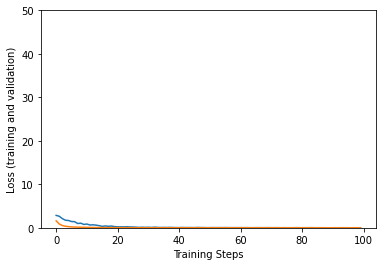

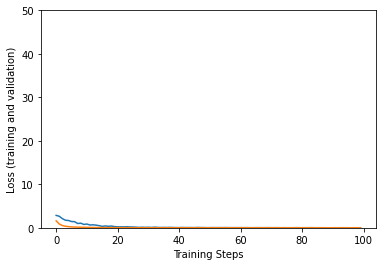

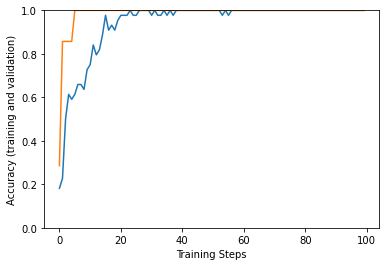

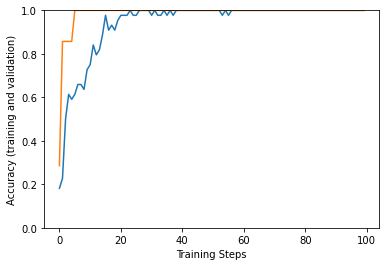

In [48]:

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,50])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

save trained model


checking the performance of the model


In [49]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (7, 224, 224, 3)
Validation batch shape: (7, 224, 224, 3)


In [50]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Adrenaline' 'Ethane' 'Ethene' 'Ethylene' 'Isopentane'
 'M-Xykene (1,3 - Dimethylbenzene)' 'Neopentane'
 'P-Xylene (1,4 - Dimethylbenzene)' 'Phenylalanine' 'Propylene'
 'Acetaminophen' 'Acetylsalicylic' 'Benzene' 'Ibuprofen'
 'O-Xylene (1,2 - Dimethylbenzene)' 'Unknown']
['Adrenaline' 'Ethane' 'Ethene' 'Ethylene' 'Isopentane'
 'M-Xykene (1,3 - Dimethylbenzene)' 'Neopentane'
 'P-Xylene (1,4 - Dimethylbenzene)' 'Phenylalanine' 'Propylene'
 'Acetaminophen' 'Acetylsalicylic' 'Benzene' 'Ibuprofen'
 'O-Xylene (1,2 - Dimethylbenzene)' 'Unknown']


In [51]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (7, 16)
Prediction results shape: (7, 16)


In [52]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Benzene' 'Benzene' 'Unknown' 'Benzene' 'Benzene' 'Benzene' 'Benzene']
['Benzene' 'Benzene' 'Unknown' 'Benzene' 'Benzene' 'Benzene' 'Benzene']


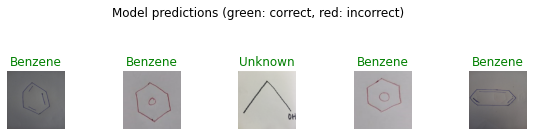

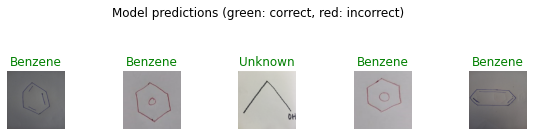

In [53]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [57]:
tf_model_pred = model.predict("../Datasets/Ethane/Ethane.jpeg")


predicted_ids2 = np.argmax(tf_model_pred, axis=-1)
predicted_labels2 = dataset_labels[predicted_ids2]
print(predicted_labels2)

IndexError: list index out of range

IndexError: list index out of range